In [1]:
!pip install seaborn

In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
laptop_data = pd.read_csv('laptops.csv', encoding='ISO-8859-1',index_col=0)
laptop_data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
laptop_data.shape

(1303, 12)

In [6]:
laptop_data.drop(['Product',
                 'ScreenResolution',
                 'Cpu',
                 'Memory',
                 'Gpu',
                 'Weight'],inplace=True,axis=1)

In [7]:
laptop_data.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price_euros
210,Dell,Notebook,15.6,6GB,Windows 10,439.00
1034,Dell,2 in 1 Convertible,15.6,4GB,Windows 10,795.99
1277,MSI,Gaming,15.6,8GB,Windows 10,1229.00
581,Lenovo,Notebook,15.6,4GB,Windows 10,685.00
970,Dell,2 in 1 Convertible,13.3,8GB,Windows 10,1899.00
4,Apple,Ultrabook,15.4,16GB,macOS,2537.45
133,Dell,Notebook,15.6,8GB,Windows 10,638.99
681,Lenovo,Notebook,15.6,4GB,Windows 10,349.00
855,Dell,Notebook,15.6,4GB,Windows 10,739.00
826,HP,Netbook,11.6,4GB,Chrome OS,385.00


In [8]:
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [9]:
laptop_data.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

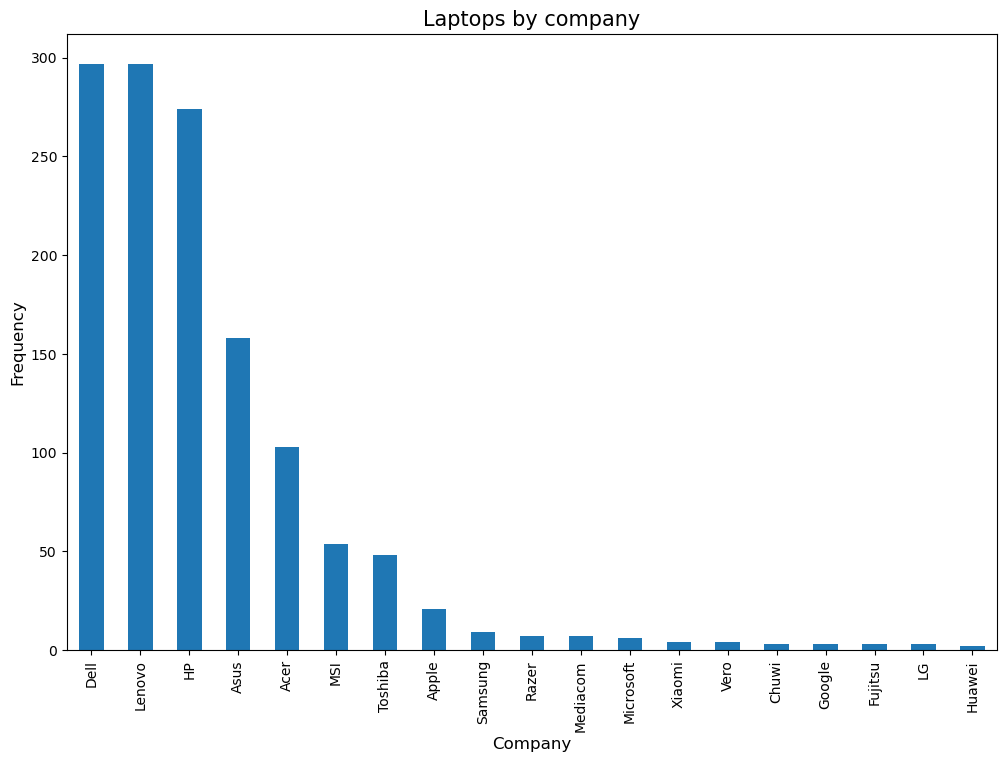

In [10]:
plt.figure(figsize=(12,8))
laptop_data['Company'].value_counts().plot(kind='bar')
plt.title('Laptops by company',fontsize=15)
plt.xlabel('Company',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

<Axes: >

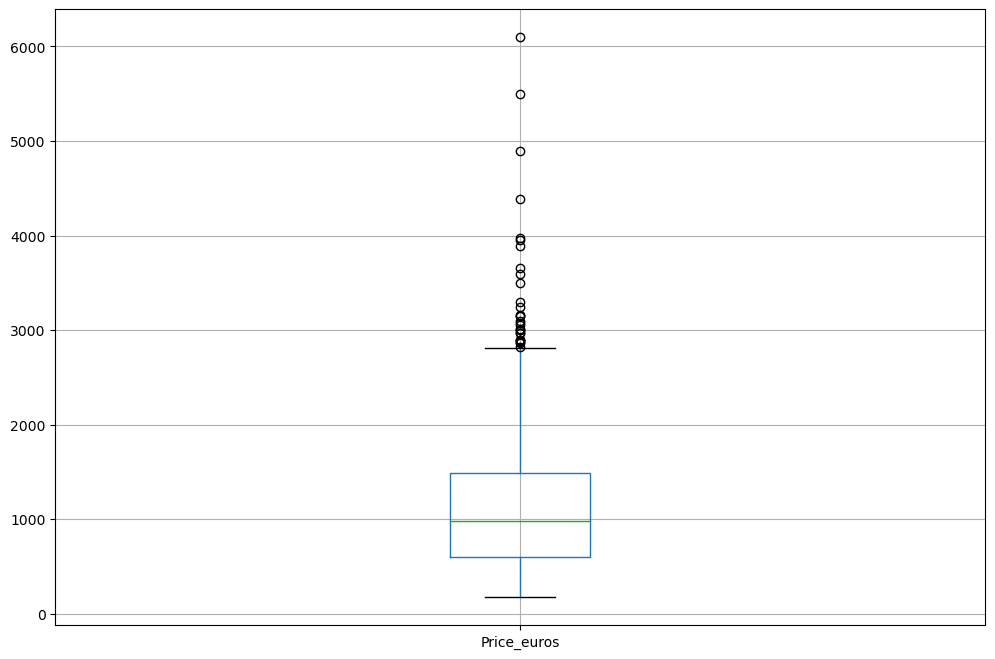

In [11]:
plt.figure(figsize=(12,8))
laptop_data[['Price_euros']].boxplot()

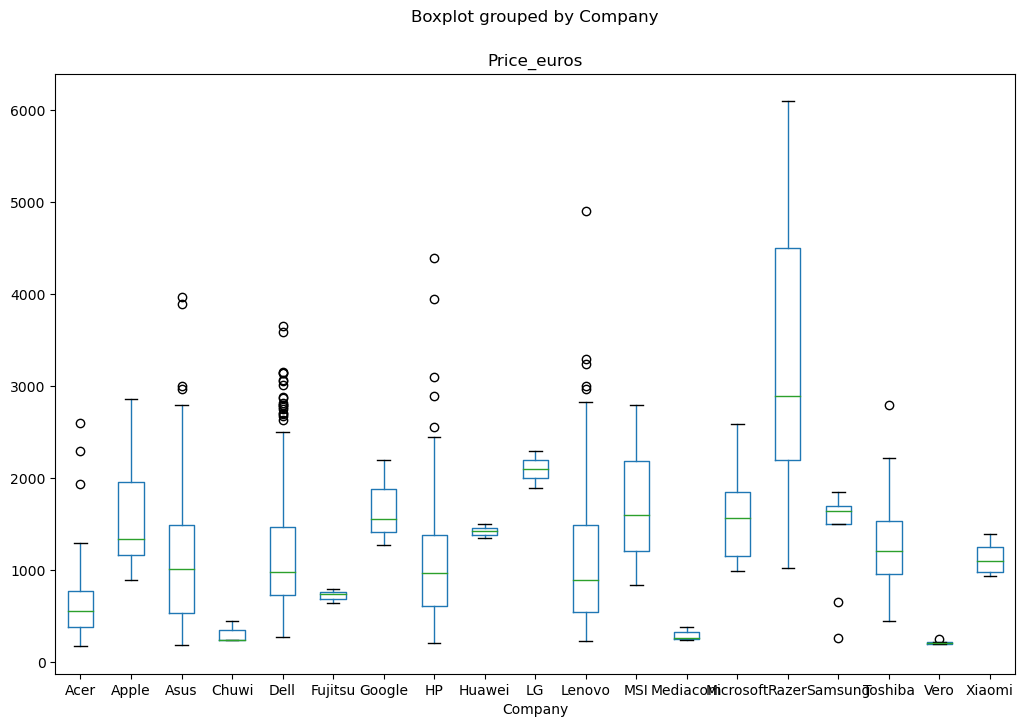

In [12]:
laptop_data.boxplot(by='Company',column=['Price_euros'],
                   grid=False,figsize=(12,8))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


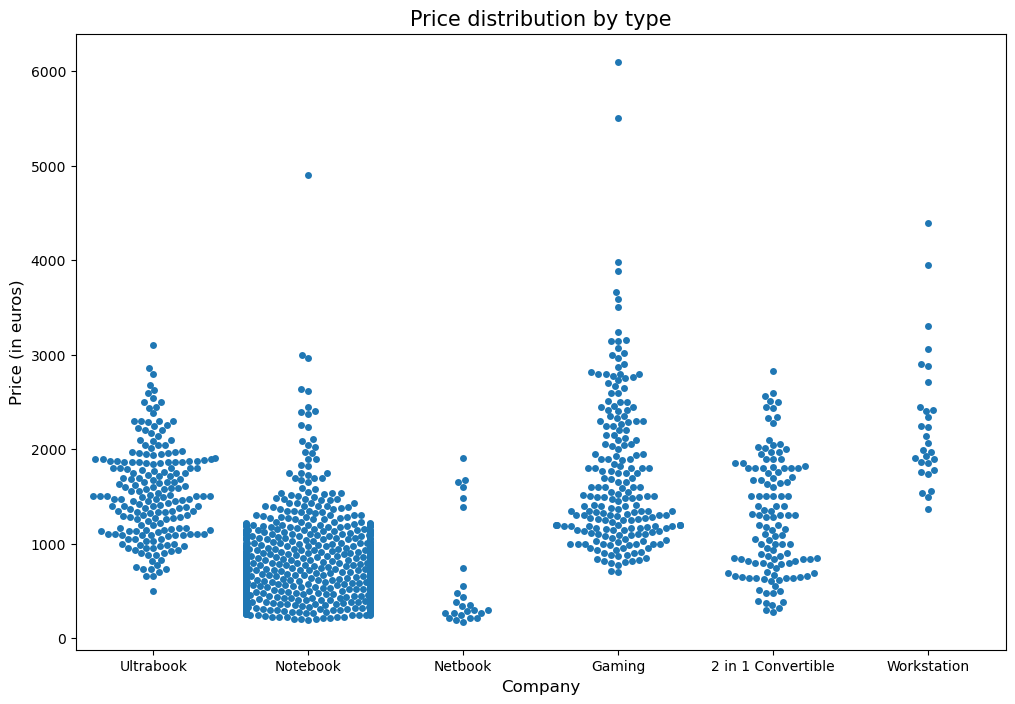

In [13]:
plt.figure(figsize=(12,8))
sns.swarmplot(x="TypeName",y='Price_euros',data=laptop_data)
plt.title('Price distribution by type',fontsize=15)
plt.xlabel('Company',fontsize=12)
plt.ylabel('Price (in euros)',fontsize=12)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
laptop_data['TypeName'] = label_encoder.fit_transform(laptop_data['TypeName'])

In [15]:
laptop_data.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,4,13.3,8GB,macOS,1339.69
2,Apple,4,13.3,8GB,macOS,898.94
3,HP,3,15.6,8GB,No OS,575.00
4,Apple,4,15.4,16GB,macOS,2537.45
5,Apple,4,13.3,8GB,macOS,1803.60


In [16]:
dummy_laptop_data = pd.get_dummies(laptop_data)
dummy_laptop_data.head()

,TypeName,Inches,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Ram_8GB,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1,4,13.3,1339.69,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,4,13.3,898.94,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,15.6,575.00,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4,15.4,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,4,13.3,1803.60,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [17]:
dummy_laptop_data.shape

(1303, 40)

In [18]:
x=dummy_laptop_data.drop('Price_euros',axis=1)
y=dummy_laptop_data['Price_euros']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [20]:
x_train.shape,x_test.shape

((1042, 39), (261, 39))

In [21]:
y_train.shape,y_test.shape

((1042,), (261,))

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [23]:
linear_regression.score(x_train,y_train)

0.6673212168279142

In [24]:
y_pred = linear_regression.predict(x_test)
r2_score(y_test,y_pred)

0.6791658804537641

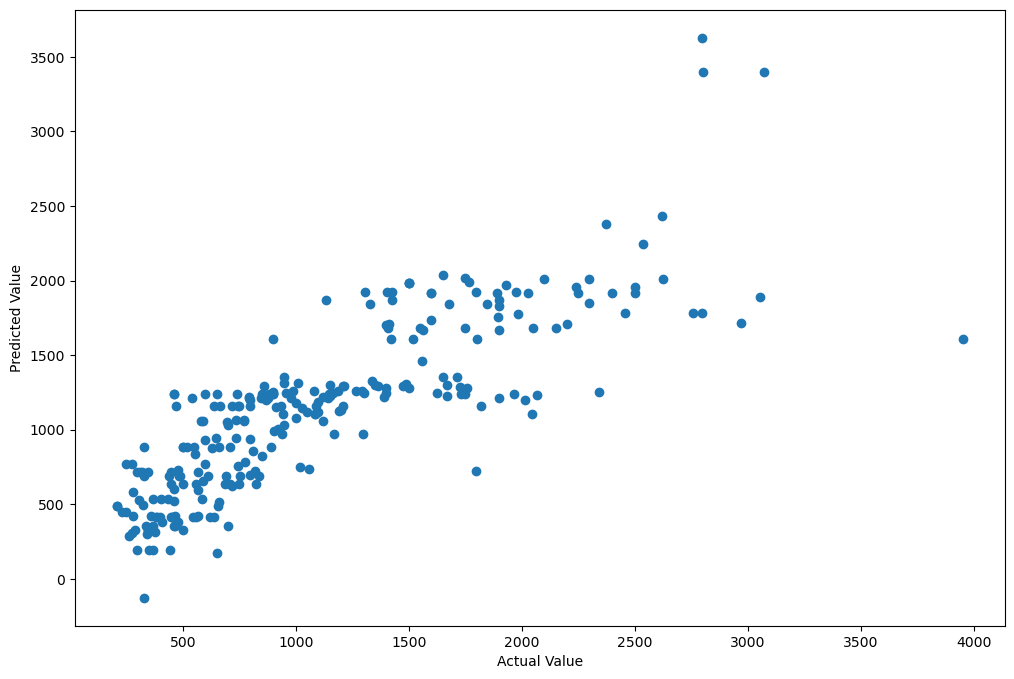

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()